# Project Business Statistics: E-news Express


## Define Problem Statement and Objectives

## Business Context

The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement.  The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]


## Objective

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?

2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

3. Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]

4. Is the time spent on the new page the same for the different language users?


## Data Dictionary

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

1. user_id - Unique user ID of the person visiting the website

2. group - Whether the user belongs to the first group (control) or the second group (treatment)

3. landing_page - Whether the landing page is new or old

4. time_spent_on_the_page - Time (in minutes) spent by the user on the landing page

5. converted - Whether the user gets converted to a subscriber of the news portal or not

6. language_preferred - Language chosen by the user to view the landing page

## Import all the necessary libraries

In [47]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scipy==1.11.4 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
#Loading dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Reading the Data into a DataFrame

In [4]:
#Read data of the dataset
data = pd.read_csv('/content/drive/MyDrive/dataset/abtest.csv')

In [5]:
# copying data to another variable to avoid any changes to original data
df = data.copy()

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

#### Data Overview

In [6]:
# view the first 5 rows of the dataset
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


#### Observation


*   The dataset contains the

**user_id** of the person visiting the website.

**group** for the first group (control) or the second group (treatment).

**landing_page** is new or old.

**time_spent_on_the_page** by the user on the landing page.

**converted** to a subscriber of the news portal or not.

**language_preferred** by the user to view the landing page.



In [7]:
# view the last 5 rows of the dataset
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [8]:
# view the shape of the dataset
df.shape

(100, 6)

#### Observation


*  The dataset contains information about a sample of 100 user_ids in a row with 6 columns.



In [9]:
# Data types of the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


#### Observation


*   The columns **user_id**, and **time_spent_on_the_page** are of **integer datatype** (numerical)
*   The columns **group, landing_page, converted** and **language_preferred** are of **object datatype**.





In [10]:
# The statistical summary in the dataset
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
user_id,100.0,546517.0000,52.295779,546443.00,546467.75,546492.500,546567.2500,546592.00
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


#### Observation

The above table displays the descriptive analysis for Numerical columns

* `Time_spent_on_the_page:` The minimum time spent by users on the landing page is 0.19 minutes, averagely 5.3778 minutes, and the maximum time is 10 minutes.




#### Check for missing values

In [11]:
# checking for missing values in the dataset
df.isnull().sum()

,0
user_id,0
group,0
landing_page,0
time_spent_on_the_page,0
converted,0
language_preferred,0


#### Observation


*  There are no missing values in the data.



#### Check for duplicates

In [12]:
# checking for duplicate in the dataset
df.duplicated().sum()

0

#### Observation


*  There are no duplicate in the dataset.


### Univariate Analysis

#### Time_spent_on_the_page

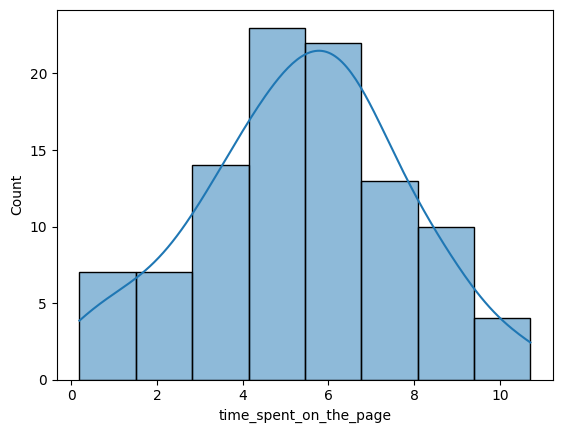

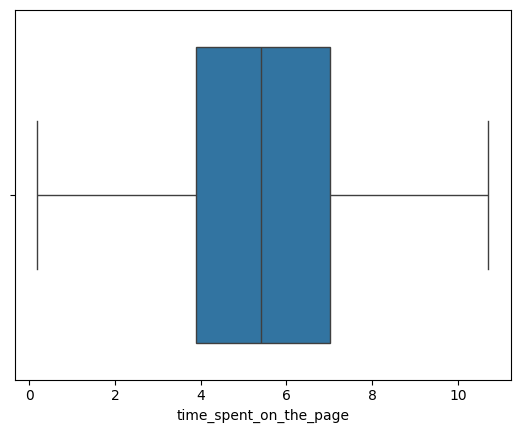

In [13]:
# Histplot for 'time_spent_on_the_page
sns.histplot(data=df,x='time_spent_on_the_page', kde='True')
plt.show()
sns.boxplot(data=df,x='time_spent_on_the_page',)
plt.show()

#### Observation


* The histogram shows the distribution of the time spent on the page. It appears to be a normal distribution with a bell-shaped curve and a peak around 5 minutes.
*   The boxplot shows a similar distribution, with the median time spent on the page being slightly above 5 minutes.

#### Group

In [14]:
#Count of unique values in the 'group' column
df['group'].value_counts()

,count
group,
control,50
treatment,50


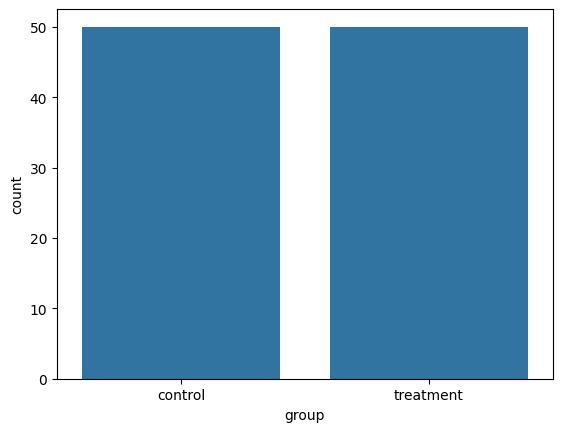

In [15]:
# Countplot for 'group'
sns.countplot(data=df,x='group',)
plt.show()

#### Observation


*   Both the control and treatment groups have the same number of users (50 each).


#### Landing page

In [16]:
#Count of unique values in the 'landing_page' column
df['landing_page'].value_counts()

,count
landing_page,
old,50
new,50


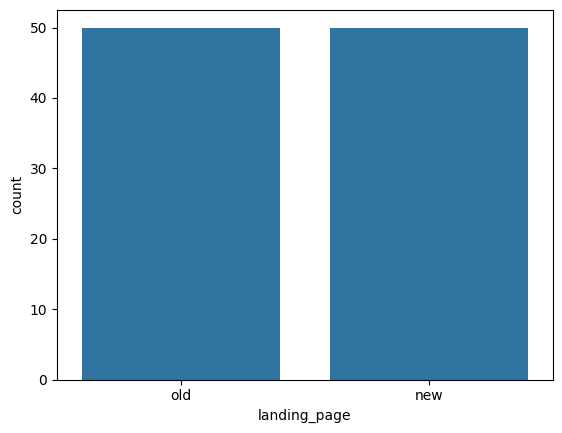

In [17]:
# Countplot for 'landing_page'
sns.countplot(data=df,x='landing_page', )
plt.show()

#### Observation


*  Both the old and new landing pages have the same number of subscribers (50 each).

#### Converted

In [18]:
#Count of unique values in the 'converted' column
df['converted'].value_counts()

,count
converted,
yes,54
no,46


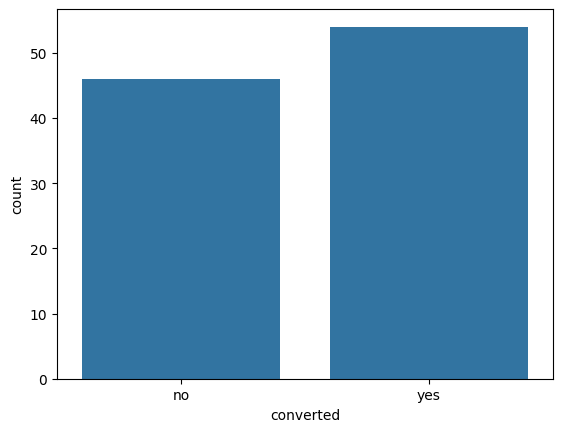

In [19]:
# Countplot for 'converted'
sns.countplot(data=df,x='converted',)
plt.show()

#### Observation


*  The data shows that 54 out of the 100 samples were converted (yes), while 46 were not converted (no), indicating a conversion rate of 54%. This suggests a slightly higher likelihood of conversion.


#### Language preferred

In [20]:
#Count of unique values in the 'language_preferred' column
df['language_preferred'].value_counts()

,count
language_preferred,
Spanish,34
French,34
English,32


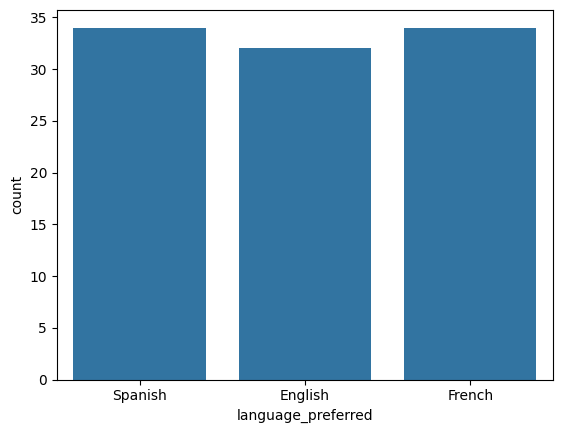

In [21]:
# Countplot for 'language_preferred'
sns.countplot(data=df,x='language_preferred',)
plt.show()

#### Observation


*  The data shows that language preferences are fairly evenly distributed, with 34 individuals each preferring Spanish and French and 32 individuals preferring English.


### Bivariate Analysis

#### Landing page vs Time spent on the page

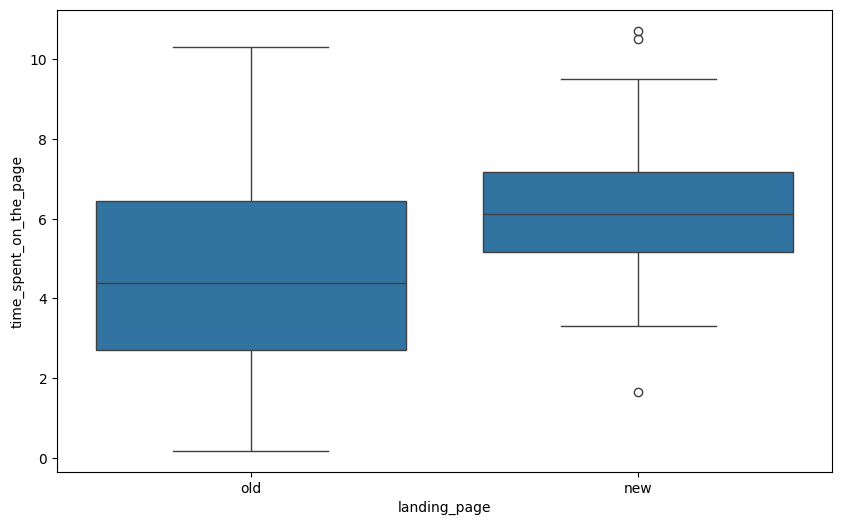

In [22]:
# Relationship between 'landing_page' and 'time_spent_on_the_page' columns
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page', )
plt.show()

#### Observation

*    The boxplot visually confirms that users generally spend more time on the new landing page compared to the old one.
*   However, outliers are noticed on the new landing page.

#### Conversion status vs Time spent on the page

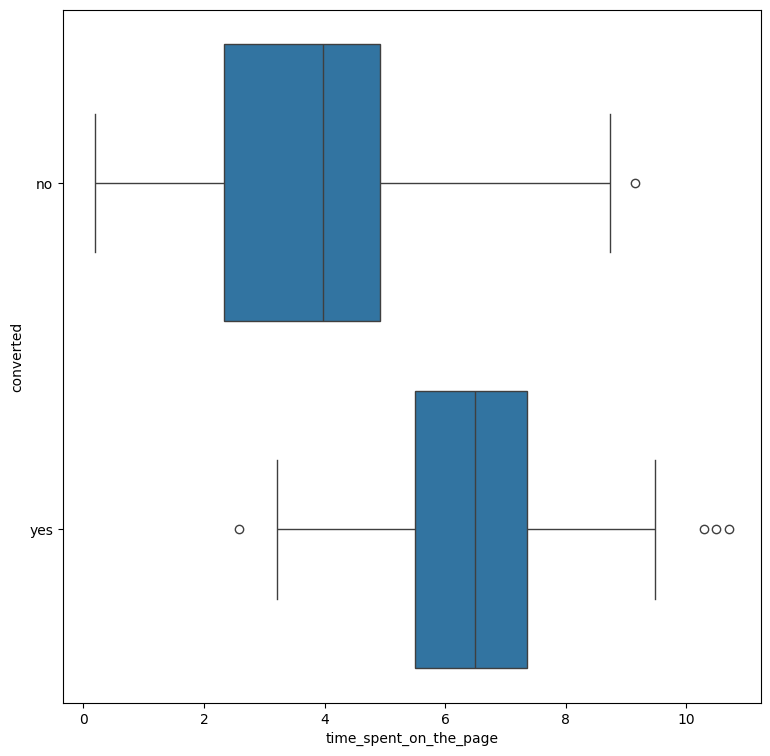

In [23]:
# Relationship between 'time_spent_on_the_page' and 'converted' columns
plt.figure(figsize=(9, 9))
sns.boxplot(data = df, x = 'time_spent_on_the_page', y = 'converted',)
plt.show()

#### Observation


*  The median time spent on the page appears higher for those who converted (yes) compared to those who did not (no), suggesting that users who spent more time on the page were more likely to convert.

* There are outliers in both groups.




#### Language preferred vs Time spent on the page

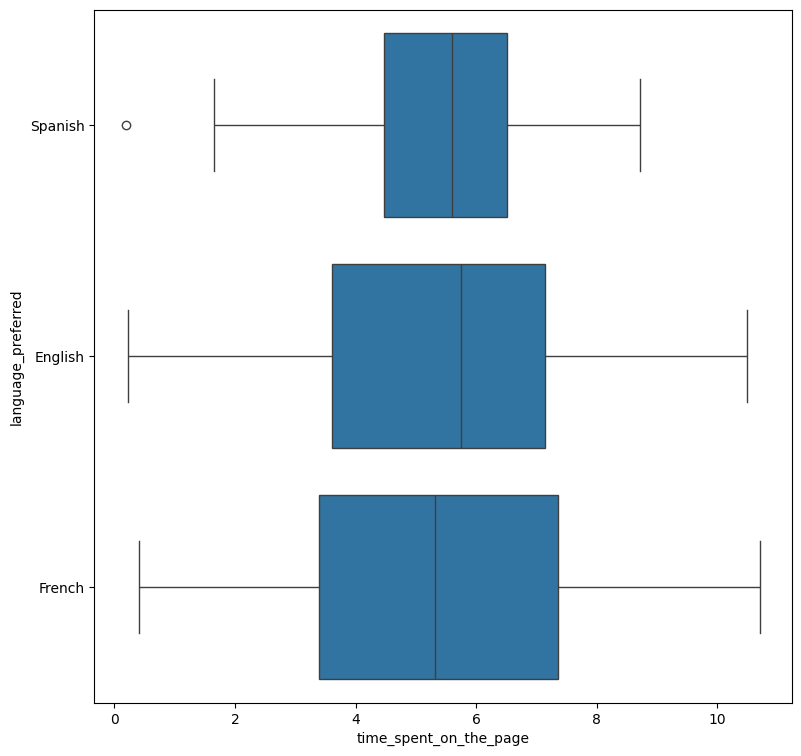

In [24]:
# Distribution of 'time_spent_on_the_page' among the 'language_preferred'
plt.figure(figsize=(9, 9))
sns.boxplot(data = df, x = 'time_spent_on_the_page', y = 'language_preferred',)
plt.show()

#### Observation

*  The boxplot shows that the distribution of time spent on the page varies slightly across different language preferences, with no significant difference in the median times, suggesting similar engagement levels regardless of the preferred language.


## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

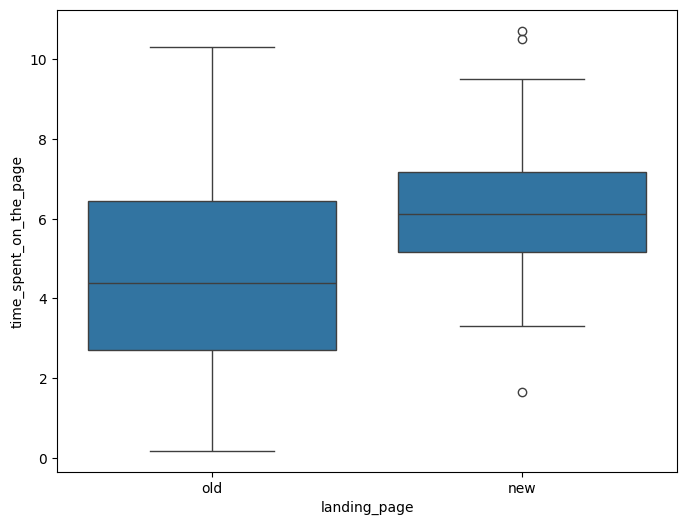

In [25]:
# visual analysis of the time spent on the new page and the time spent on the old page
plt.figure(figsize=(8,6))
sns.boxplot(x = 'landing_page', y = 'time_spent_on_the_page', data = df,)
plt.show()

#### Observation


*   The boxplot visually confirms that users generally spend more time on the new landing page compared to the old one.
*   However, outliers are noticed on the new landing page.

### Step 1: Define the null and alternate hypotheses

> $H_0:$ The mean time spent by users on the new landing page is equal to or less than the mean time spent by users on the old landing page. <br>

> $H_a:$ The mean time spent by users on the new landing page is greater than the mean time spent by users on the old landing page.

Let $\mu$ be the mean time of on landing page.

Mathematically, the above formulated hypotheses can be written as:

>$H_0: \mu (new) = μ(old) $ <br>
$H_a: \mu (new) > μ(old) $


### Step 2: Select Appropriate test

This is a one-tailed test concerning two population means from two independent populations. The population standard deviations are unknown. **This is an independent samples t-test.**

### Step 3: Decide the significance level

As given in the problem statement, we select $\alpha = 0.05$.

### Step 4: Collect and prepare data

In [26]:
# create subsetted data frame for new landing page users
time_spent_new = df[df['landing_page'] == 'new']['time_spent_on_the_page']

# create subsetted data frame for old landing page users
time_spent_old = df[df['landing_page'] =='old']['time_spent_on_the_page']

In [27]:
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_new.std(),2))
print('The sample standard deviation of the time spent on the old page is:', round(time_spent_old.std(),2))

The sample standard deviation of the time spent on the new page is: 1.82
The sample standard deviation of the time spent on the old page is: 2.58


**Based on the sample standard deviations of the two groups, decide whether the population standard deviations can be assumed to be equal or unequal**. The sample standard deviations are 1.82 and 2.58. These values are not close enough to assume that the population standard deviations are equal. **Thus, we will assume unequal population standard deviations.**

**The test statistic follows a t distribution.**

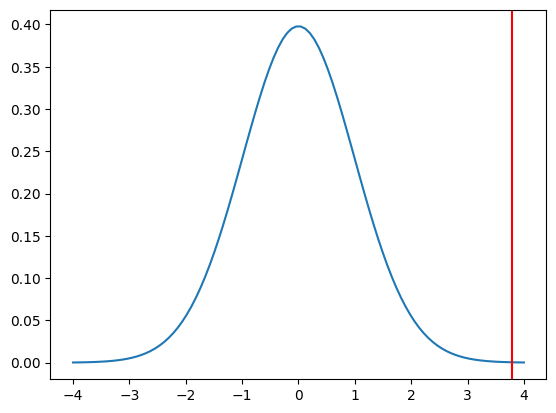

In [28]:
# plot the t-stat distribution
# import the required function
from scipy.stats import t
# import the required function
from scipy.stats import ttest_ind # import the ttest_ind function

# plotting the distribution of t test statistic along with the computed test statistic
# We are plotting the distributions here to better visualize the calculations
x = np.linspace(-4, 4, 100) # create an array of 100 numbers starting from -4 and ending at 4
plt.plot(x, t.pdf(x,df=len(df)-1)) # plot the pdf of the t distribution with n-1 degrees of freedom

# calculate the test statistic and p-value
test_stat, p_value =  ttest_ind(time_spent_new, time_spent_old, equal_var = False, alternative = 'greater')

plt.axvline(x = test_stat, c = 'r') # draw a vertical red line through the mentioned point
plt.show() # display the plot

### Step 5: Calculate the p-value

In [29]:
#import the required function
from scipy.stats import ttest_ind

#calculate the p-value
test_stat, p_value =  ttest_ind(time_spent_new, time_spent_old, equal_var = False, alternative = 'greater')

print('The p-value is', p_value)
print("Test Statistic =", test_stat)


The p-value is 0.0001392381225166549
Test Statistic = 3.7867702694199856


### Step 6: Compare the p-value with $\alpha$

In [30]:
# conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference


*   The p-value is less than the significance level of 0.05, so we reject the null hypothesis.
*   There is sufficient evidence to conclude that the users mean time is higher on the new landing page than they were on the old one.





**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

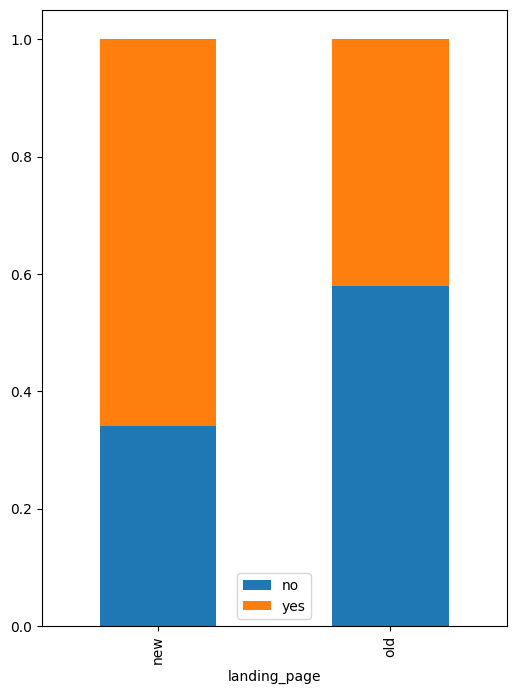

In [31]:
# visually compare the conversion rate for the new page and the conversion rate for the old page
pd.crosstab(df['landing_page'],df['converted'],normalize='index').plot(kind="bar", figsize=(6,8),stacked=True)
plt.legend()
plt.show()

#### Observation

*   The stacked bar plot shows the proportion of users who converted on each landing page, revealing that the new page has a higher conversion rate compared to the old page, indicating its greater effectiveness in driving conversions.



### Step 1: Define the null and alternate hypotheses

> $H_0:$ The conversion rate of the new landing page is less than or equal to the conversion rate of the old landing page.. <br>

> $H_a:$ The conversion rate of the new landing page is greater than the conversion rate of the old landing page.

Let $p$$p$ be the conversion rate.

Mathematically, the above formulated hypotheses can be written as:


$H_0: p(new) \le p(old)$

$H_a: p(new) > p(old)$

### Step 2: Select Appropriate test

This is a one-tailed test concerning two population proportions from two independent populations. **This is the two-proportion Z-test.**

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [32]:
# number of converted users in the treatment group
new_converted = df[df['group'] == 'treatment']['converted'].value_counts()['yes']
#number of converted users in the control group
old_converted = df[df['group'] == 'control']['converted'].value_counts()['yes']

n_control = df.group.value_counts()['control'] # total number of users in the control group

### Step 5: Calculate the p-value

In [33]:
# import the required function
from statsmodels.stats.proportion import proportions_ztest

n_treatment = df.group.value_counts()['treatment'] # total number of users in the treatment group

# calculate the p-value
test_stat, p_value = proportions_ztest([new_converted, old_converted] , [n_treatment, n_control], alternative ='larger')

print('The p-value is', p_value)

The p-value is 0.008026308204056278


### Step 6: Compare the p-value with $\alpha$

In [34]:
# conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

Since the p-value (0.008) is less than the significance level (α = 0.05), we reject the null hypothesis and conclude that the conversion rate of the new landing page is significantly greater than the conversion rate of the old landing page. This suggests that the new landing page is more effective in converting users.

## 3. Is the conversion and preferred language are independent or related?

### Perform Visual Analysis

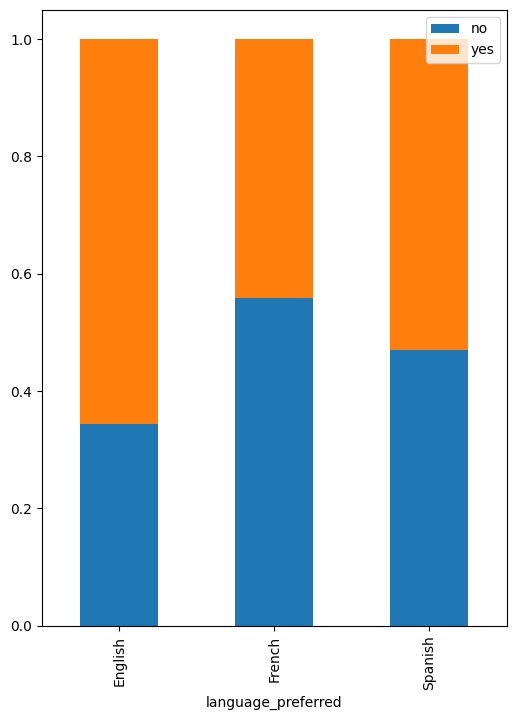

In [35]:
# visually plot the dependency between conversion status and preferred langauge
pd.crosstab(df['language_preferred'],df['converted'],normalize='index').plot(kind="bar", figsize=(6,8), stacked=True, )
plt.legend()
plt.show()

#### Observation

*  The English language groups have a higher proportion of users who converted compared to others based on stacked bar representation.


### Step 1: Define the null and alternate hypotheses

$H_0:$ Conversion and preferred language are independent of each other. <br>

$H_a:$ Conversion and preferred language are related to each other.

Mathematically, the above formulated hypotheses can be written as:

$H_0:$$H_0:$ No association between conversion and preferred language.

$H_a:$$H_a:$ There is an association between conversion and preferred language.

### Step 2: Select Appropriate test

This is a problem of the test of independence, concerning two categorical variables - converted status and preferred language. The appropriate test is the **Chi-Square test of independence.**

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [36]:
# contingency table showing the distribution of the two categorical variables
contingency_table = pd.crosstab(df['language_preferred'], df['converted'])

contingency_table

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


### Step 5: Calculate the p-value

In [37]:
# import the required function
from scipy.stats import chi2_contingency

# calculate the p-value
chi2, p_value, dof, exp_freq = chi2_contingency(contingency_table)
print('The p-value is', p_value)

The p-value is 0.2129888748754345


### Step 6: Compare the p-value with $\alpha$

In [38]:
# conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.2129888748754345 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference



*   Since the p-value (0.213) is greater than the significance level (0.05), we fail to reject the null hypothesis.
*   Therefore, there is not enough evidence to conclude that there is an association between conversion and preferred language. The data suggests that conversion and language preference are independent of each other.



## 4. Is the time spent on the new page same for the different language users?

### Perform Visual Analysis

In [39]:
# a new DataFrame for users who got served the new page
df_new = df[df['landing_page'] == 'new']

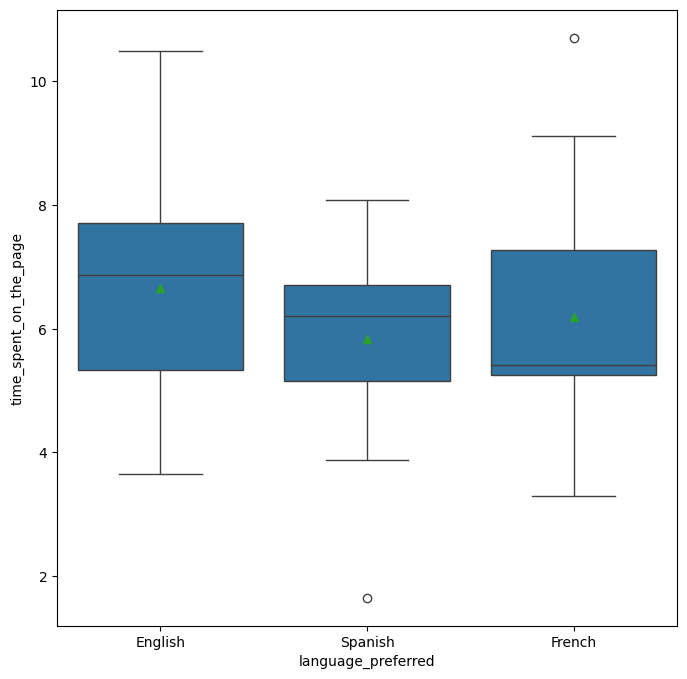

In [40]:
# visually plot the time spent on the new page for different language users
plt.figure(figsize=(8,8))
sns.boxplot(x = 'language_preferred', y = 'time_spent_on_the_page', showmeans = True, data = df_new,)
plt.show()

#### Observation

*  The boxplot reveals the distribution of time spent on the new page by users of different languages, showing variations in both median time and spread, suggesting that the time spent may differ among language groups.


*   If the mean markers (shown as dots) differ significantly across languages, this indicates potential differences in user engagement depending on their preferred language.



In [41]:
# calculating the mean time spent on the new page for different language users
df_new.groupby(['language_preferred'])['time_spent_on_the_page'].mean()

,time_spent_on_the_page
language_preferred,
English,6.663750
French,6.196471
Spanish,5.835294


### Step 1: Define the null and alternate hypotheses

$H_0:$ The average time spent on the new page is the same for users of different languages.

$H_a:$ The average time spent on the new page is not the same for users of different languages.

$H_0: \mu_{English} = \mu_{French} = \mu_{Spanish}$

$H_0: \mu_{English} = \mu_{French} = \mu_{Spanish}$

$H_a:$$H_a:$ At least one mean is different

### Step 2: Select Appropriate test

This is a problem, concerning three population means. **The appropriate test is a one-way ANOVA test (analysis of variance).**

**Shapiro-Wilk’s test**

We will test the null hypothesis

>$H_0:$ The distributions are normal.

against the alternative hypothesis

>$H_a:$ The distributions are not normal.

In [42]:
# Assumption 1: Normality
# Use the shapiro function for the scipy.stats library for this test
from scipy.stats import shapiro # import the shapiro function from the scipy.stats module

# find the p-value
test_stat, p_value = shapiro(df_new['time_spent_on_the_page'])

print('The p-value is', p_value)

The p-value is 0.8040040364746845


Since p-value of the test is very large than the 5% significance level, we fail to reject the null hypothesis that the response follows the normal distribution

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [43]:
# create a subsetted data frame of the time spent on the new page by English language users
time_spent_English = df_new[df_new['language_preferred']=="English"]['time_spent_on_the_page']
# create subsetted data frames of the time spent on the new page by French and Spanish language users
time_spent_French = df_new[df_new['language_preferred']=="French"]['time_spent_on_the_page']
time_spent_Spanish = df_new[df_new['language_preferred']=="Spanish"]['time_spent_on_the_page']

### Step 5: Calculate the p-value

In [44]:
# complete the code to import the required function
from scipy.stats import f_oneway

# write the code to calculate the p-value
test_stat, p_value = f_oneway(time_spent_English, time_spent_French, time_spent_Spanish)   #complete the code by filling appropriate parameters in the blanks

print('The p-value is', p_value)

The p-value is 0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

In [45]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

*  Since the p-value (0.432) is greater than the significance level (0.05), we fail to reject the null hypothesis.
*   Therefore, there is not enough evidence to conclude that the average time spent on the new page is different for users of different languages.The data suggests that the average time spent is roughly the same for all language preferences.



## Conclusion and Business Recommendations

#### Conclusion


* It is observed that users spend more time on the new landing page compared to
the old one, this indicates that the new design and content are more engaging.

* The conversion rate for the new landing page is significantly greater than that for the old landing page. This suggests that the new design is more effective at converting users into subscribers.

* There is no significant association between a user’s preferred language and their likelihood of converting, suggesting that the new page’s effectiveness is independent of the language.


*  there is no significant difference in the average time spent on the new landing page by users of different language preferences. The engagement time is roughly the same regardless of the language chosen.


#### Business Recommendations



*  The new landing page has proven to increase both user engagement (time spent on the page) and conversion rates. E-News Express should roll out the new landing page to all users. This will likely result in an increase in new subscribers, addressing the recent decline.

*  The new landing page design has positively affected user engagement and conversions; further investment in enhancing the quality and relevance of the content could lead to even better results. Regular updates and optimizations based on user feedback and behavior analysis should be considered.

*  As there is no significant correlation between language preference and conversion rates, E-news Express should continue to offer the landing page in multiple languages but does not need to prioritize one over the other


*  Regular monitoring and analysis of user behavior data should be done to identify any emerging trends or potential issues with the new landing page. This will help in making data-driven decisions for future optimizations.

* E-news Express is likely to enhance user engagement and achieve a sustainable increase in new subscribers.





___

In [46]:
!jupyter nbconvert --to html /content/ENews_Express_Learner_Notebook_Full_Code.ipynb

[NbConvertApp] WARNING | pattern '/content/ENews_Express_Learner_Notebook_Full_Code.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--Jup